In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [6]:
dicData ={'hours' : [2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8],
'scores' : [21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]}

In [11]:
data = pd.DataFrame(dicData)

In [12]:
data.head()

,hours,scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hours   25 non-null     float64
 1   scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [14]:
data.describe()

,hours,scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


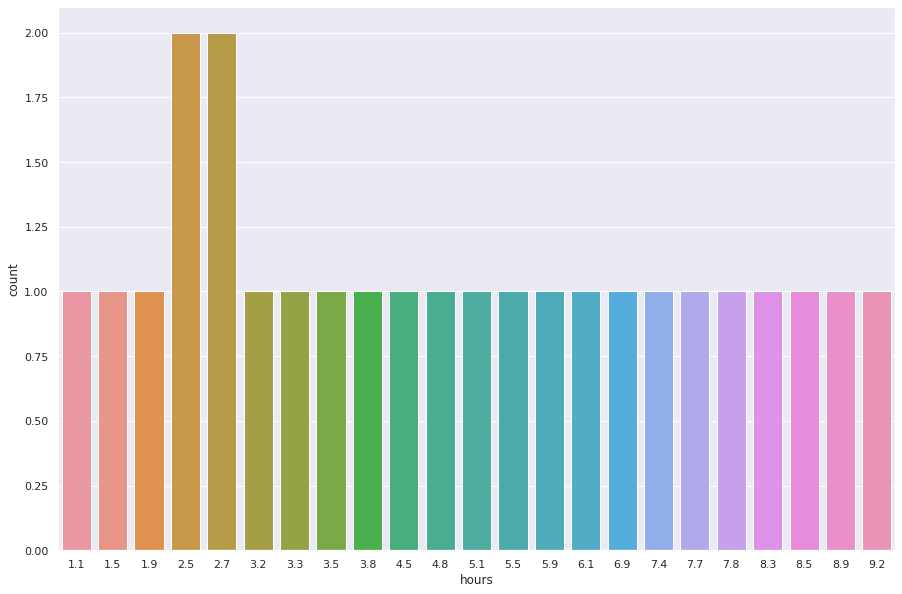

In [64]:
sns.countplot('hours',data=data)
sns.set(rc={'figure.figsize':(15,10)})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


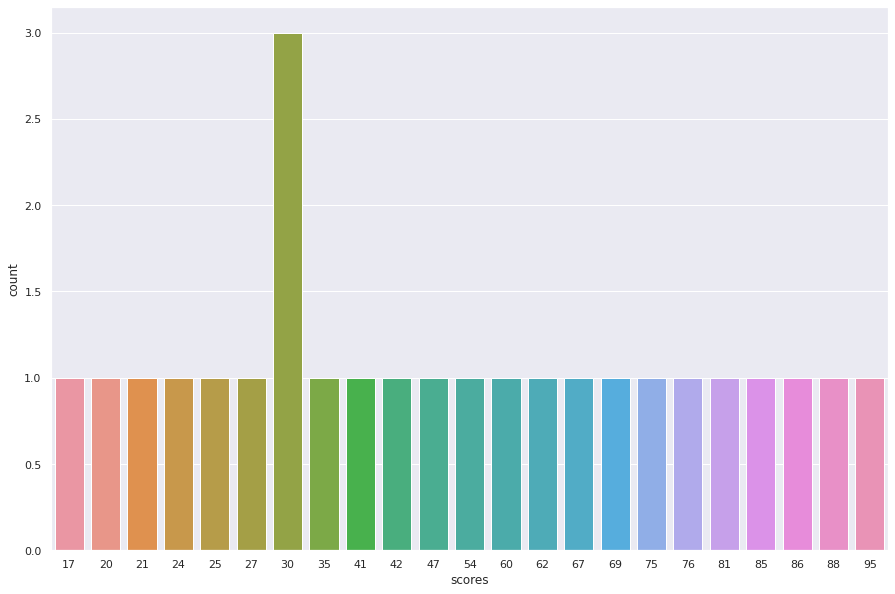

In [65]:
sns.countplot('scores',data=data)
sns.set(rc={'figure.figsize':(15,10)})

In [59]:
succs = data['scores'][data['scores']>=60]
fail  =data['scores'][data['scores']<60]


In [60]:

s_f = [len(succs),len(fail)]

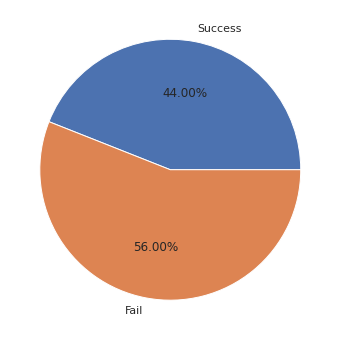

In [67]:
plt.figure(figsize=(8, 6))
plt.pie(s_t,labels =['Success','Fail'], autopct = "%0.2f%%")
plt.show()

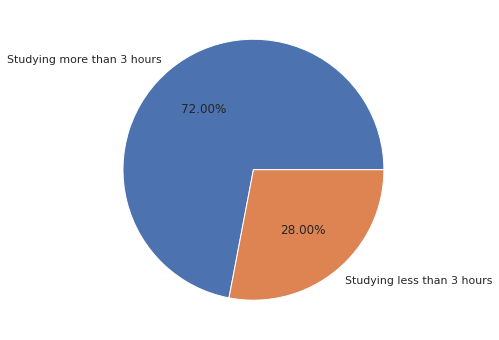

In [70]:
more_than3 = data['hours'][data['hours']>=3]
less_than3  =data['hours'][data['hours']<3]
more_less =[len(more_than3),len(less_than3 )]
plt.figure(figsize=(8, 6))
plt.pie(more_less,labels =['Studying more than 3 hours','Studying less than 3 hours'], autopct = "%0.2f%%")
plt.show()

<Figure size 576x432 with 0 Axes>

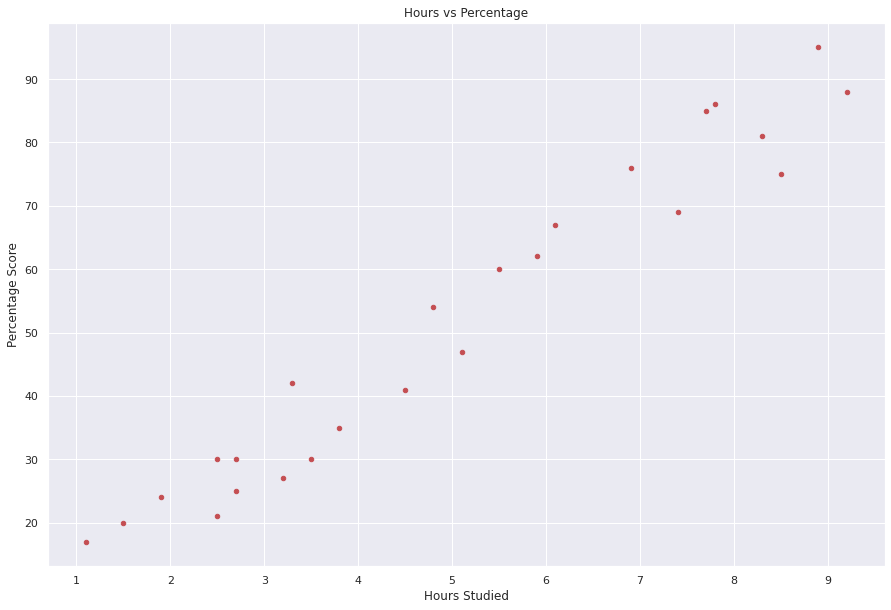

In [80]:
plt.figure(figsize=(8, 6))
data.plot.scatter('hours','scores',color= 'r')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [84]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3125, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
print('\u03F4\u2080 =',regressor.intercept_)
print('\u03F4\u2081 =' ,regressor.coef_[0]) 


ϴ₀ = 2.3708153823418883
ϴ₁ = 9.788566686749045


In [94]:
y_hat = regressor.predict(X_test)

In [96]:
predVsactual= pd.DataFrame({'Actual': y_test, 'Predicted': y_hat})
predVsactual.head()

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359


In [98]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

Mean Absolute Error: 4.419727808027651
Mean Squared Error: 22.965097212700428
Root Mean Squared Error: 4.7921912746363144


<Figure size 504x360 with 0 Axes>

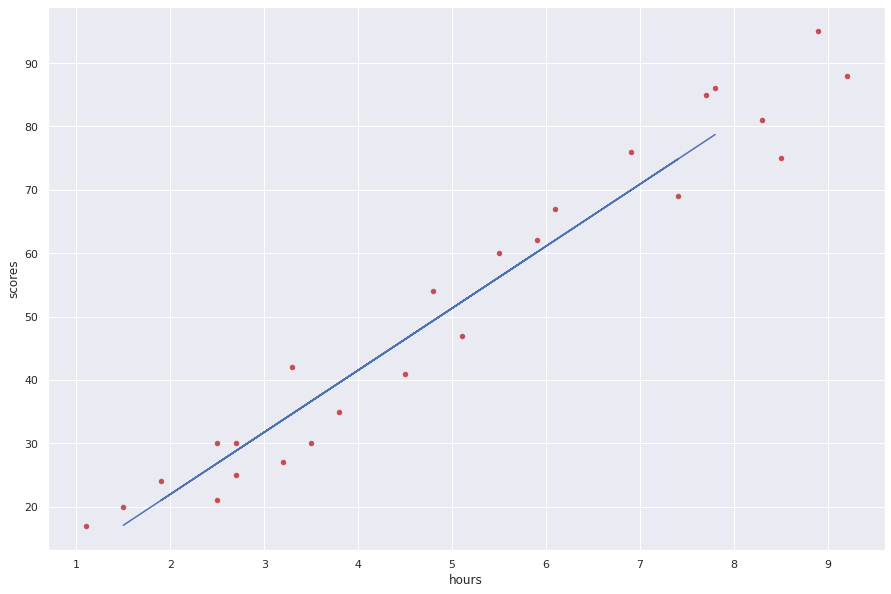

In [108]:
plt.figure(figsize=(7, 5))
data.plot.scatter('hours','scores',color= 'r')
plt.plot(X_test,y_hat)